# 1.Data collection

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Understanding the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 4.Relationship check
before using any model , we must confirm relationship

Text(0.5, 1.0, 'Total Bill vs Tip')

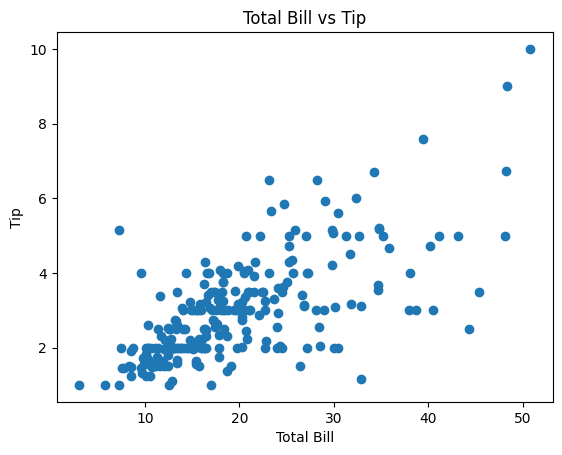

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')   
plt.title('Total Bill vs Tip')

#Observations:
1.As the bill incerases tip increases

2.Realtionship=Straight line(we can use linear regression)

## 4.Feature & Target seperation

In [8]:
x=df[['total_bill']] #feature i/p must be in 2d only
y=df['tip']          #feature o/p 1d

#5.Train test split..why? a model must perform well on unseen data

In [9]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.0 MB 6.6 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/8.0 MB 9.2 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 8.1 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 7.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.6 MB/s  0:00:01
Using cached joblib-1.5.3-py3-none-any.w


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


## 6. Feature standardization

why?
1.compare the co-efficients fairly

2.Avoid the dominance of large values

3.Prepare for ridge/lasso

In [11]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# 7.Train Linear Regression model

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("coefficient(m):",model.coef_[0])
print("intercept(c):",model.intercept_)
y_pred=model.predict(x_test_scaled)

coefficient(m): 0.9357171400271826
intercept(c): 3.0877948717948724


# 8.Model Evaluation metrics

In [13]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("R2 Score:",r2)

Mean Squared Error: 0.5688142529229538
Mean Absolute Error: 0.6208580000398983
Root Mean Squared Error: 0.7541977545199626
R2 Score: 0.5449381659234664


# 9.Visualize the best fit line

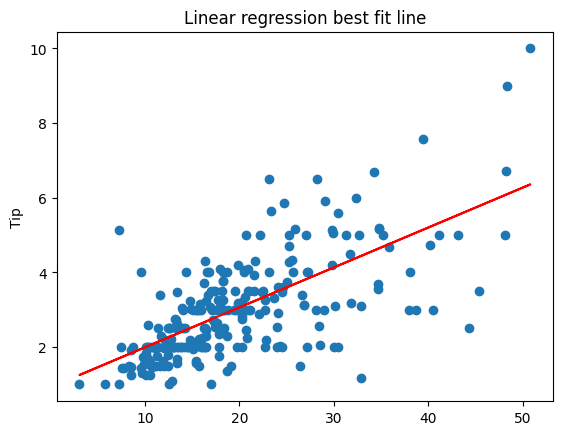

In [14]:
plt.scatter(x,y)
plt.plot(
    x,
    model.predict(scaler.transform(x)),
    color="red"
)
plt.ylabel("Tip")
plt.title("Linear regression best fit line")
plt.show()

# 10.Input-Output Real time

In [16]:
from sklearn.preprocessing import StandardScaler
bill_amount=float(input("Enter the total bill amount: ")) 
bill_scaled=scaler.transform([[bill_amount]])
predicted_tip=model.predict(bill_scaled)
print(f"Predicted tip amount for a bill of {bill_amount} is: {predicted_tip[0]:.2f}")

Predicted tip amount for a bill of 120.0 is: 13.76


c:\Users\rajna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
bill_scaled=scaler.transform([[bill_amount]])

c:\Users\rajna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
predicted_tip=model.predict(bill_scaled)

In [19]:
print(f"Predicted tip amount for a bill of {bill_amount} is: {predicted_tip[0]:.2f}")

Predicted tip amount for a bill of 120.0 is: 13.76
